# Prediksi jenis kaca (glass Type)

## Data Understanding


### Sumber dataset


https://archive.ics.uci.edu/dataset/42/glass+identification


### penjelasan fitur dan variabel

Dataset ini mengaitkan komposisi kimia kaca dengan jenis kaca, berdasarkan kandungan unsur-unsur kimia dan indeks bias. Dataset ini berasal dari USA Forensic Science Service dan digunakan untuk keperluan forensik, khususnya untuk mengidentifikasi tipe kaca berdasarkan komposisinya.

Dataset ini menggabungkan informasi kimiawi dari berbagai jenis kaca dan digunakan untuk membangun model klasifikasi yang dapat memprediksi jenis kaca berdasarkan kandungan oksida di dalamnya.

Sumber dataset berasal dari pengujian laboratorium yang mengukur konsentrasi unsur-unsur dalam bentuk berat oksida pada berbagai sampel kaca.

Tujuan dari dataset ini adalah untuk mempelajari pola kimia yang umum digunakan dalam berbagai jenis kaca, serta membangun model machine learning yang mampu mengklasifikasi jenis kaca berdasarkan atribut-atribut tersebut.

Dataset ini cocok untuk eksplorasi fisika-kimia bahan dan pemodelan klasifikasi multikelas berbasis fitur numerik.


Fitur yang Digunakan
- RI: Refractive Index (Indeks Bias)

- Na: Sodium (dalam bentuk oksida)

- Mg: Magnesium (dalam bentuk oksida)

- Al: Aluminium (dalam bentuk oksida)

- Si: Silicon (dalam bentuk oksida)

- K: Potassium (dalam bentuk oksida)

- Ca: Calcium (dalam bentuk oksida)

- Ba: Barium (dalam bentuk oksida)

- Fe: Iron (dalam bentuk oksida)



In [1]:
%pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset Glass Identification (UCI ID: 42)
glass = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass.data.features     # Fitur: RI, Na, Mg, Al, Si, K, Ca, Ba, Fe
y = glass.data.targets      # Target: Type (jenis kaca)

# metadata
print(glass.metadata)

# informasi variabel
print(glass.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Ambil dataset dari UCI
glass = fetch_ucirepo(id=42)

# Ambil fitur dan target
X = glass.data.features     # RI, Na, Mg, Al, Si, K, Ca, Ba, Fe
y = glass.data.targets      # Type

# Gabungkan fitur dan target ke satu DataFrame
df_glass = pd.concat([X, y], axis=1)

# Tampilkan info dasar
print("Total baris dataset ini adalah =", len(df_glass))
print("Visualisasi dataset Glass Identification:")
print(df_glass)


Total baris dataset ini adalah = 214
Visualisasi dataset Glass Identification:
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type_of_glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0             

In [4]:
# Simpan DataFrame hasil gabungan fitur + target ke file CSV
df_glass.to_csv('dataset_glass_identification.csv', index=False)


### preprocessing Data

Karena seluruh fitur pada dataset Glass Identification sudah berbentuk angka numerik kontinu (seperti RI, Na, Mg, Al, dll), Preprocessing yang digunakan saat ini meliputi feature selection, standardisasi data menggunakan StandardScaler, dan pembagian data menggunakan train_test_split agar data siap digunakan dalam proses pelatihan model machine learning seperti Decision Tree.

In [8]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Ambil dataset Glass dari UCI (ID = 42)
glass = fetch_ucirepo(id=42)

# 2. Gabungkan fitur dan target jadi satu DataFrame
X = glass.data.features
y = glass.data.targets
df_glass = pd.concat([X, y], axis=1)

# 3. Gunakan kolom target yang benar: 'Type_of_glass'
X = df_glass.drop(columns=['Type_of_glass'])
y = df_glass['Type_of_glass']

# 4. Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Cek hasil
print("✅ Preprocessing selesai!")
print("Ukuran data training :", X_train.shape)
print("Ukuran data testing  :", X_test.shape)


✅ Preprocessing selesai!
Ukuran data training : (171, 9)
Ukuran data testing  : (43, 9)


### splitting

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


### Visualisasi Data setelah Normalisasi

In [11]:
print(X)  # menampilkan fitur asli sebelum di-scale


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [12]:
# Ubah hasil scaling ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan kembali dengan target
df_glass_preprocessed = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Simpan ke file CSV
df_glass_preprocessed.to_csv('dataset_glass_preprocessed.csv', index=False)

print("✅ Dataset hasil preprocessing berhasil disimpan.")


✅ Dataset hasil preprocessing berhasil disimpan.


### Modelling

Modeling merupakan proses membangun dan menguji model klasifikasi yang digunakan untuk menganalisis pola dan hubungan antara komposisi kimia kaca (RI, Na, Mg, Al, dll) dengan jenis kaca (Type_of_glass).

Dalam konteks dataset Glass Identification, tujuan utama dari proses pemodelan adalah untuk memprediksi tipe kaca berdasarkan karakteristik kimianya dengan menggunakan algoritma machine learning seperti Decision Tree, KNN, atau SVM.

Melalui modeling, kita dapat menemukan pola penting dalam data yang berguna untuk klasifikasi, serta menguji akurasi model tersebut terhadap data yang belum pernah dilihat sebelumnya.

### Modelling Klasifikasi Jenis Kaca Berdasarkan Komposisi Kimia menggunakan Decision Tree


##  1. Tujuan Pemodelan

Pemodelan ini bertujuan untuk **mengklasifikasikan jenis kaca (`Type_of_glass`)** berdasarkan **komposisi kimia** dari kaca tersebut. Komposisi seperti kadar `Na`, `Mg`, `Al`, `Si`, `K`, dan elemen lain memberikan karakteristik unik yang dapat digunakan untuk membedakan jenis kaca seperti kaca bangunan, kaca mobil, dan lainnya.

Kategori kelas target dalam model ini terdiri dari beberapa kelas, seperti:

* Kaca bangunan (float processed dan non-float processed)
* Kaca wadah
* Kaca kendaraan
* Kaca lampu, dll

Model klasifikasi yang digunakan adalah **Decision Tree Classifier**, yaitu metode *supervised learning* berbasis pohon keputusan. Setiap cabang dalam pohon mewakili keputusan berdasarkan fitur kimia kaca, dan setiap daun menunjukkan hasil klasifikasi jenis kaca.


##  2. Pembagian Dataset: Data Latih dan Data Uji

Langkah awal dalam pemodelan adalah membagi dataset menjadi dua bagian utama:

* **Data Latih (Training Set)**: digunakan untuk melatih model agar mengenali pola dalam data.
* **Data Uji (Testing Set)**: digunakan untuk menguji akurasi model terhadap data baru yang belum pernah dilihat sebelumnya.

Dalam eksperimen ini digunakan pembagian data dengan rasio **80:20**, artinya **80% untuk pelatihan dan 20% untuk pengujian**. Rasio ini cukup ideal untuk dataset kecil seperti Glass Identification yang hanya memiliki 214 entri.


##  3. Pra-Pemrosesan Data

Sebelum digunakan dalam model, dilakukan beberapa langkah *preprocessing* terhadap data kaca:

* **Feature Selection**: memilih semua fitur kimia (`RI`, `Na`, `Mg`, dll.) sebagai input (`X`) dan `Type_of_glass` sebagai target (`y`).
* **Standardisasi Data**: semua fitur numerik distandardisasi menggunakan `StandardScaler` agar memiliki skala yang seragam (mean = 0 dan std = 1).
* **Train-Test Split**: membagi data menjadi data latih dan uji menggunakan fungsi `train_test_split` dari `sklearn`.

Proses ini memastikan bahwa model menerima data berskala seragam dan bisa mengevaluasi performanya secara adil.


##  4. Pelatihan Model Decision Tree

Model dilatih menggunakan algoritma **Decision Tree Classifier** dengan parameter:

* **Kriteria**: `gini` (untuk mengukur ketidakmurnian pada tiap node)
* **Random state**: `42` (agar hasil bisa direproduksi)

Pohon keputusan dibangun dengan membagi data berdasarkan fitur kimia yang paling membantu dalam membedakan jenis kaca. Proses pemisahan ini dilakukan secara rekursif sampai struktur pohon optimal ditemukan.


##  5. Evaluasi Model

Setelah pelatihan, model dievaluasi menggunakan metrik berikut:

* **Akurasi**: proporsi prediksi yang benar terhadap total data uji.
* **Classification Report**: menunjukkan metrik **precision**, **recall**, dan **F1-score** untuk setiap kelas `Type_of_glass`.
* **Confusion Matrix**: melihat bagaimana prediksi model tersebar antar kelas kaca.
* **Visualisasi Struktur Pohon**: memperlihatkan bagaimana model mengambil keputusan berdasarkan fitur-fitur kimia kaca.


##  6. Prediksi dan Interpretasi

Model yang telah dilatih dapat digunakan untuk:

* **Memprediksi jenis kaca baru** berdasarkan nilai-nilai fitur kimia.
* **Menganalisis fitur paling penting** (misalnya `RI` dan `Ca`) yang memiliki pengaruh besar dalam membedakan jenis kaca.


Akurasi: 0.7441860465116279

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.75      0.60      0.67        15
           3       0.50      0.67      0.57         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         6

    accuracy                           0.74        43
   macro avg       0.70      0.79      0.73        43
weighted avg       0.75      0.74      0.74        43



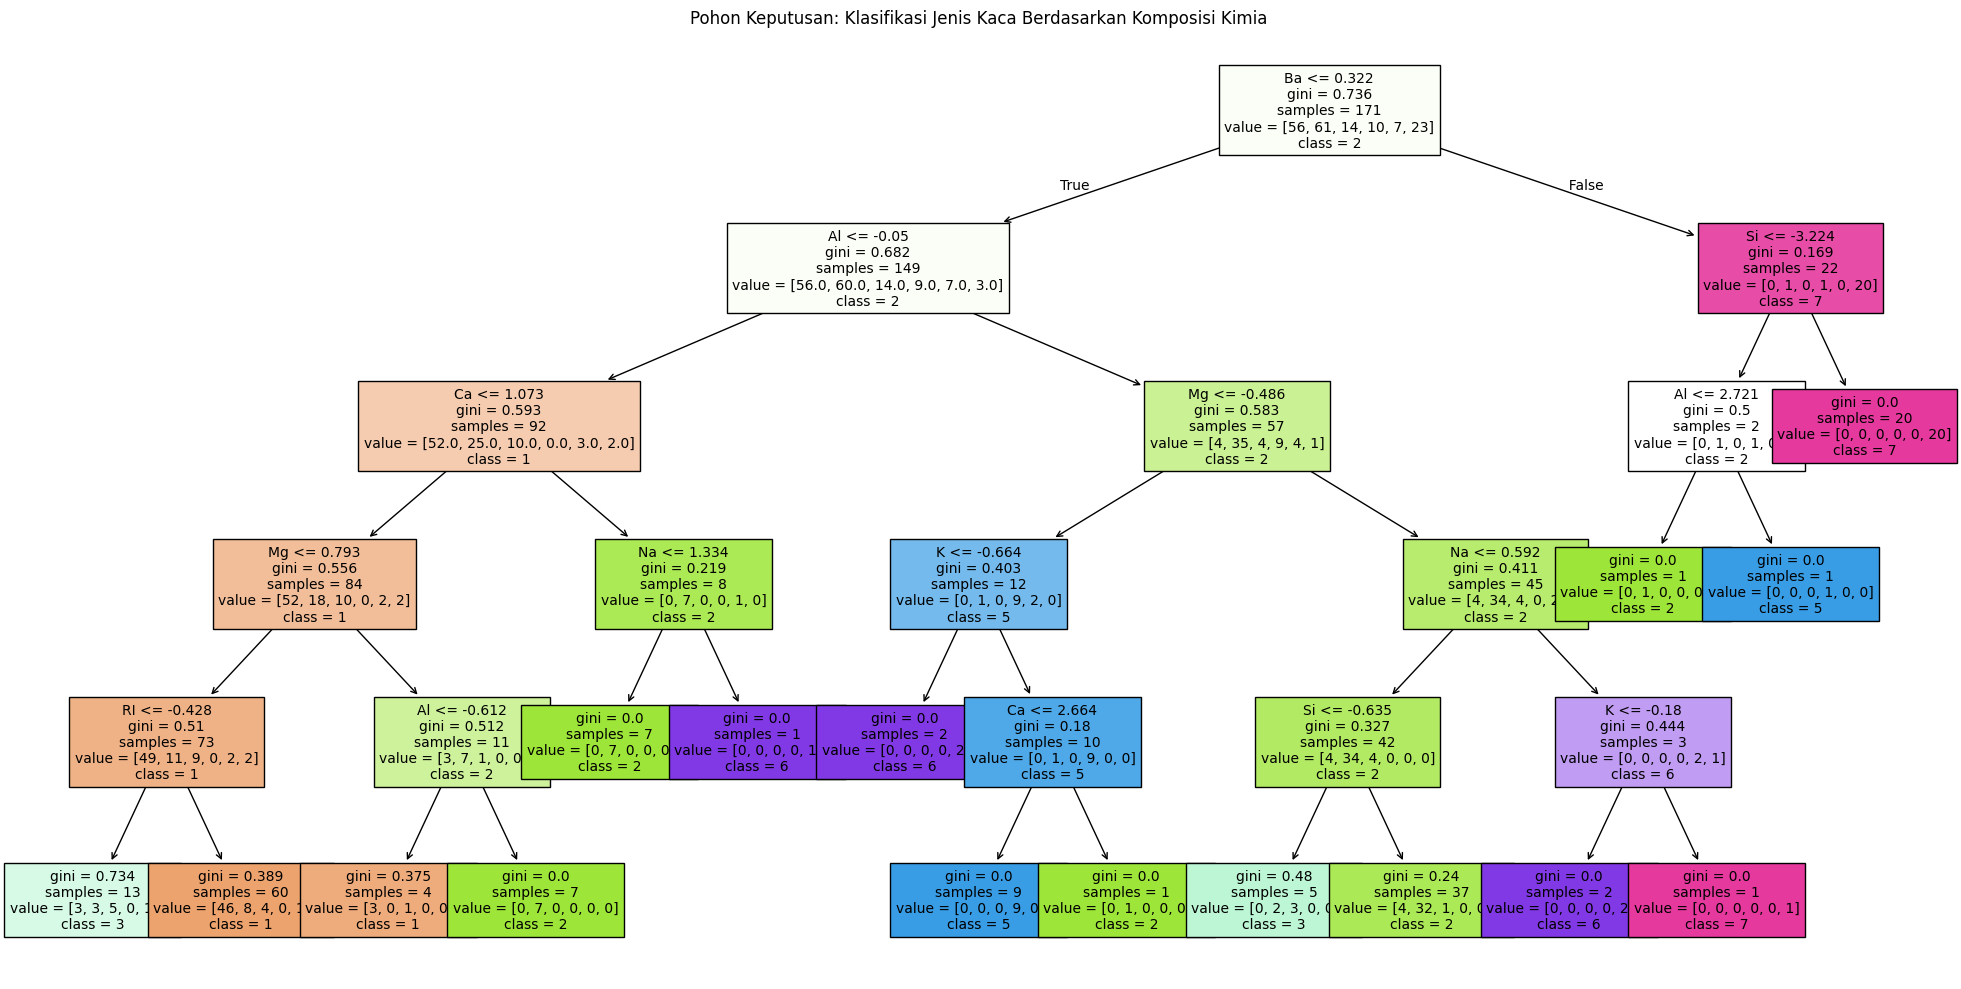

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 6. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 7. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))  # Tidak perlu target_names jika label numerik

# === 8. Visualisasi Pohon Keputusan ===
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],  # Misalnya: ['1', '2', '3', ...]
          filled=True,
          fontsize=10)
plt.title("Pohon Keputusan: Klasifikasi Jenis Kaca Berdasarkan Komposisi Kimia")
plt.tight_layout()
plt.show()






##  **1. Tujuan Pemodelan**

Tujuan dari pemodelan ini adalah untuk **mengklasifikasikan jenis kaca** berdasarkan komposisi kimianya. Data yang digunakan berasal dari dataset *Glass Identification* yang berisi fitur-fitur seperti indeks bias (`RI`), dan kandungan unsur kimia (`Na`, `Mg`, `Al`, `Si`, `K`, `Ca`, `Ba`, dan `Fe`).

Model yang digunakan adalah **Random Forest Classifier**, yaitu algoritma *supervised learning* berbasis banyak pohon keputusan (decision trees). Setiap pohon dibangun dari subset acak data dan fitur, dan hasil klasifikasi ditentukan dengan **voting mayoritas** dari seluruh pohon.



##  **2. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi dua bagian:

* **Training Set (80%)** – digunakan untuk melatih model.
* **Testing Set (20%)** – digunakan untuk menguji kinerja model terhadap data yang belum pernah dilihat.

Pembagian ini bertujuan agar model dapat belajar cukup banyak dari data, namun tetap bisa diuji secara objektif.



##  **3. Pra-Pemrosesan Data**

Tahapan *preprocessing* yang dilakukan sebelum membangun model meliputi:

* Karena seluruh fitur (`RI`, `Na`, `Mg`, `Al`, dll.) sudah berbentuk angka numerik kontinu, maka **tidak diperlukan proses encoding tambahan**.
* Fitur-fitur ini kemudian **dinormalisasi menggunakan `StandardScaler`** agar semua fitur berada dalam skala yang seragam, meskipun Random Forest sebenarnya **tidak sensitif terhadap skala fitur**.

Namun normalisasi tetap digunakan dalam proses standar agar bisa dibandingkan dengan model lain seperti KNN.



##  **4. Pelatihan Model Random Forest**

Model dilatih menggunakan **100 pohon keputusan (n\_estimators=100)**. Setiap pohon:

1. Dilatih dengan subset acak dari data latih (dengan bootstrap sampling).
2. Hanya menggunakan subset acak dari fitur saat membuat pemisahan node.
3. Pada saat prediksi, semua pohon "memberi suara", dan label yang paling sering muncul dipilih sebagai hasil akhir.

Keunggulan utama Random Forest:

* **Lebih stabil dan akurat** dibandingkan satu decision tree.
* **Mengurangi risiko overfitting**.
* Dapat memberikan informasi tentang **feature importance**, yaitu fitur mana yang paling berpengaruh terhadap prediksi.



##  **5. Evaluasi Model**

Model Random Forest dievaluasi menggunakan:

* **Akurasi**: persentase prediksi yang tepat pada data uji.
* **Classification Report**: menunjukkan *precision*, *recall*, dan *F1-score* untuk setiap kelas jenis kaca.
* **Confusion Matrix**: menampilkan distribusi prediksi benar dan salah, dan divisualisasikan menggunakan heatmap.

Evaluasi ini membantu memahami seberapa baik model membedakan berbagai jenis kaca seperti `float processed`, `container`, `tableware`, dll.



##  **6. Prediksi dan Interpretasi**

Setelah pelatihan dan evaluasi, model dapat digunakan untuk:

* **Memprediksi jenis kaca** dari data baru.
* **Mengamati feature importance**, untuk mengetahui fitur mana (seperti `RI`, `Mg`, atau `Ba`) yang paling menentukan jenis kaca tertentu.

Meskipun struktur pohon dalam Random Forest sulit diinterpretasi secara visual (karena jumlahnya banyak), fitur penting tetap bisa dilihat secara grafis melalui grafik bar.




Akurasi: 0.813953488372093

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



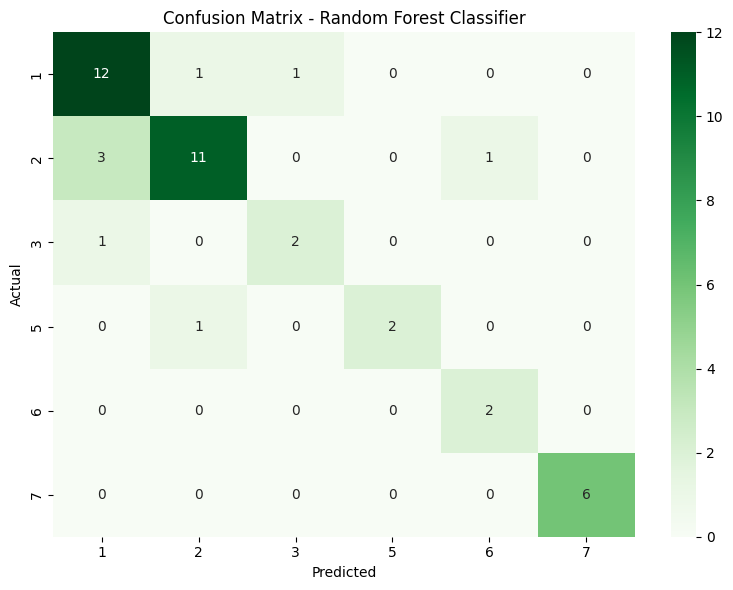

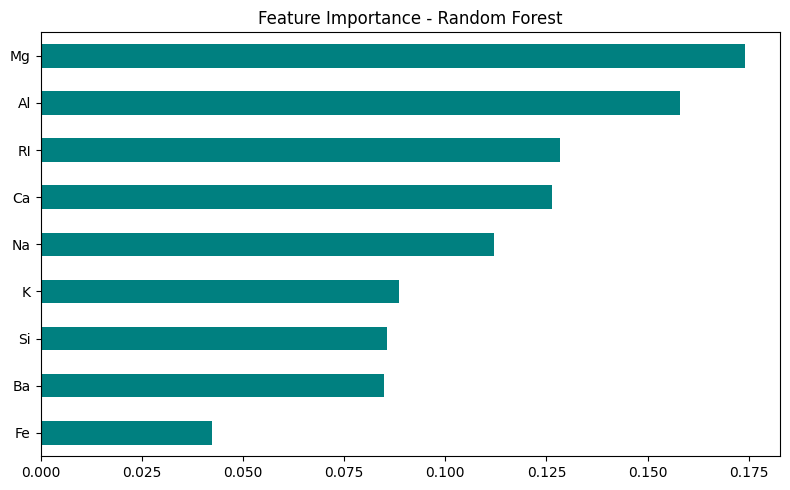

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Training Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === 2. Prediksi ===
y_pred = rf.predict(X_test)

# === 3. Evaluasi Model ===
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# === 4. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === 5. (Opsional) Pentingnya Fitur ===
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


### Modelling Klasifikasi Jenis Kaca menggunakan K-Nearest Neighbors (KNN)




##  1. Tujuan Pemodelan

Tujuan dari pemodelan ini adalah untuk **mengklasifikasikan jenis kaca (`Type_of_glass`)** berdasarkan **komposisi kimia** seperti `RI`, `Na`, `Mg`, `Al`, `Si`, `K`, `Ca`, `Ba`, dan `Fe`.
Jenis kaca dalam dataset ini meliputi beberapa kelas, seperti kaca bangunan, kaca wadah, dan kaca kendaraan, yang memiliki perbedaan berdasarkan kandungan kimianya.

Model yang digunakan adalah **K-Nearest Neighbors (KNN)**, yaitu algoritma *supervised learning* berbasis kedekatan. Dalam KNN, prediksi suatu data baru ditentukan berdasarkan **mayoritas kelas dari k tetangga terdekat** dalam ruang fitur.



##  2. Pembagian Dataset: Data Latih dan Data Uji

Dataset dibagi menjadi dua bagian utama:

* **Data Latih (Training Set)**: digunakan untuk menyimpan data referensi yang digunakan saat proses klasifikasi.
* **Data Uji (Testing Set)**: digunakan untuk mengevaluasi kemampuan model dalam mengenali jenis kaca dari data baru yang belum pernah dilihat.

Eksperimen ini menggunakan **rasio pembagian 80:20**, artinya 80% data digunakan untuk pelatihan dan 20% sisanya untuk pengujian. Rasio ini membantu menjaga keseimbangan antara pelatihan model dan pengujian akurasi.



##  3. Pra-Pemrosesan Data

Sebelum digunakan dalam model KNN, data kaca menjalani beberapa tahapan *preprocessing*, antara lain:

* **Pemilihan Fitur dan Target**: semua fitur (`RI`, `Na`, ..., `Fe`) digunakan sebagai input (`X`), dan `Type_of_glass` digunakan sebagai target (`y`).
* **Standardisasi Data**: karena KNN sensitif terhadap skala antar fitur, semua nilai numerik dinormalisasi menggunakan `StandardScaler` agar memiliki distribusi yang seragam.
* **Splitting Data**: dataset dibagi menjadi training dan testing menggunakan `train_test_split` dari `sklearn`.

Langkah-langkah ini bertujuan agar jarak antar data dalam KNN menjadi bermakna dan adil antar fitur.



##  4. Pelatihan Model K-Nearest Neighbors

Berbeda dengan algoritma klasifikasi lainnya, **KNN tidak membentuk model eksplisit** selama pelatihan. Algoritma hanya menyimpan data latih, dan proses klasifikasi dilakukan saat ada data uji.

Untuk setiap instance uji:

1. Algoritma menghitung **jarak (Euclidean)** ke seluruh data latih.
2. Mengambil **k tetangga terdekat** (dalam eksperimen ini: `k = 5`).
3. Melakukan **voting mayoritas kelas** untuk menentukan label prediksi.

Pemilihan nilai `k` sangat penting untuk menjaga keseimbangan antara **overfitting dan underfitting**.



##  5. Evaluasi Model

Model KNN dievaluasi menggunakan data uji berdasarkan metrik berikut:

* **Akurasi**: persentase prediksi yang benar dibandingkan total data uji.
* **Classification Report**:

  * **Precision**: ketepatan prediksi masing-masing kelas kaca.
  * **Recall**: seberapa banyak data aktual berhasil dikenali.
  * **F1-Score**: keseimbangan antara precision dan recall.
* **Confusion Matrix**: visualisasi distribusi prediksi benar dan salah untuk setiap kelas, ditampilkan dalam bentuk **heatmap**.



##  6. Prediksi dan Interpretasi

Model KNN yang telah dilatih dapat digunakan untuk:

* **Memprediksi jenis kaca baru** berdasarkan nilai komposisi kimianya.
* **Menganalisis kedekatan antar jenis kaca**, berdasarkan fitur kimianya di ruang multidimensi.
* Mengidentifikasi jenis kaca yang sering salah klasifikasi, misalnya jika jenis kaca dengan karakteristik mirip sulit dibedakan hanya dari fitur numerik.



Akurasi: 0.6976744186046512

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.62      0.59      0.59        43
weighted avg       0.66      0.70      0.67        43



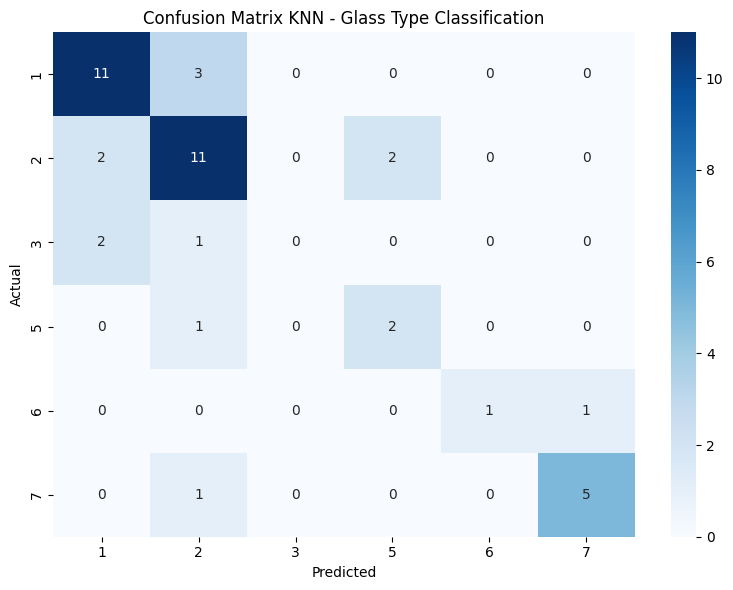

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Training KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# === Evaluasi ===
y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))  # mencegah warning jika ada kelas tidak terprediksi

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix KNN - Glass Type Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### Evaluasi Model Klasifikasi pada Dataset Glass Identification

Berdasarkan hasil pengujian terhadap dataset Gender by Name, akurasi yang diperoleh dari tiga model klasifikasi adalah sebagai berikut:

- Decision Tree Classifier = 93,45%

- K-Nearest Neighbors (KNN) = 94,31%

- Random Forest Classifier = 95,17%



In [33]:
!pip install gradio


In [34]:
import joblib

# Simpan model dan scaler
joblib.dump(rf_model, 'glass_classifier_rf.pkl')
joblib.dump(scaler, 'scaler_glass.pkl')


['scaler_glass.pkl']

In [35]:
import gradio as gr
import numpy as np
import joblib

# Load model dan scaler
model = joblib.load("glass_classifier_rf.pkl")
scaler = joblib.load("scaler_glass.pkl")

# Fitur input sesuai urutan
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Fungsi prediksi
def predict_glass(RI, Na, Mg, Al, Si, K, Ca, Ba, Fe):
    input_data = np.array([[RI, Na, Mg, Al, Si, K, Ca, Ba, Fe]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    return f"Prediksi tipe kaca: {prediction}"

# UI Gradio
interface = gr.Interface(
    fn=predict_glass,
    inputs=[gr.Number(label=feat) for feat in features],
    outputs="text",
    title="Klasifikasi Tipe Kaca (Glass Classification)",
    description="Masukkan nilai fitur kimia, sistem akan memprediksi tipe kaca berdasarkan model Random Forest"
)

# Jalankan Gradio
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://738f461f379f2dcdc7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
